# Assignment 3 - Probe Requests (Johannes Seiler) 

Basic db setup

In [2]:
# import all necessary modules
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
conn = sqlite3.connect("assignment3.sqlite") 
cur = conn.cursor()

# use panda to read captured data into a DataFrame
sessions = pd.read_sql_query("SELECT * from sessions", conn)
probes = pd.read_sql_query("SELECT * from probes", conn)
location = pd.read_sql_query("SELECT * from location", conn)


Let's start by splitting the data according to each session Start-Time

In [28]:
# get data for each of the 17 sessions
# Test-sessions: 1, 2
# Scenario 1 - train ride: 7, 8, 9, 10, 11, 12, 13 (truncated -> invalid)
# Scenario 2 - student dorm: 2, 3, 4, 5, 6, 14, 15, 16 (only 4, 5, 14, 15 contain engough probe requests)

session4 = probes[(probes["TIME"] > sessions.iloc[3]["START_TIME"]) & (probes["TIME"] < sessions.iloc[4]["START_TIME"])]
session5 = probes[(probes["TIME"] > sessions.iloc[4]["START_TIME"]) & (probes["TIME"] < sessions.iloc[5]["START_TIME"])]
session14 = probes[(probes["TIME"] > sessions.iloc[13]["START_TIME"]) & (probes["TIME"] < sessions.iloc[14]["START_TIME"])]
session15 = probes[(probes["TIME"] > sessions.iloc[14]["START_TIME"]) & (probes["TIME"] < sessions.iloc[15]["START_TIME"])]


Calculate the usage of the WLAN channels stated in the capture-settings of the Raspberry Pi:

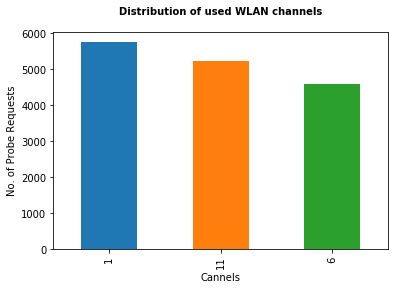

In [5]:
title_string = "Distribution of used WLAN channels"

plt.title(title_string, y=1.05, fontweight='bold', fontsize=10)
plt.xlabel('Cannels')
plt.ylabel('No. of Probe Requests')

df = probes["CHANNEL"].value_counts()[probes["CHANNEL"].value_counts()>1000]
df.plot(kind='bar')

plt.show()

Next, calculate the total number of collected probe requests for each of the four most important sessions.

In [5]:
noReqSession4 = len(session4["TIME"].unique()) 
noReqSession5 = len(session5["TIME"].unique()) 
noReqSession14 = len(session14["TIME"].unique()) 
noReqSession15 = len(session15["TIME"].unique()) 

print("Total number of probe requests:")
print("session4: " + str(noReqSession4))
print("session5: " + str(noReqSession5))
print("session14: " + str(noReqSession14))
print("session15: " + str(noReqSession15))

Total number of probe requests:
session4: 4801
session5: 1622
session14: 1129
session15: 463


Determining the distribution of manufacturers for session 4, 5, 14 and 15

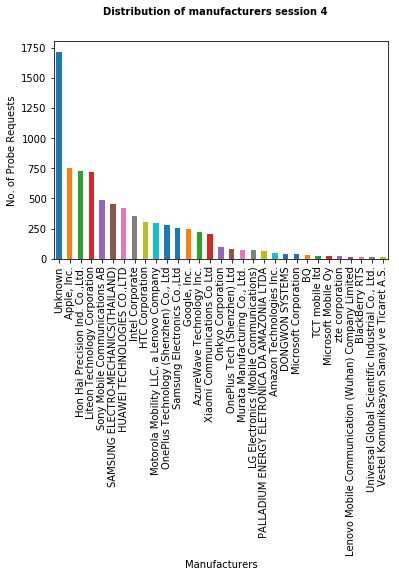

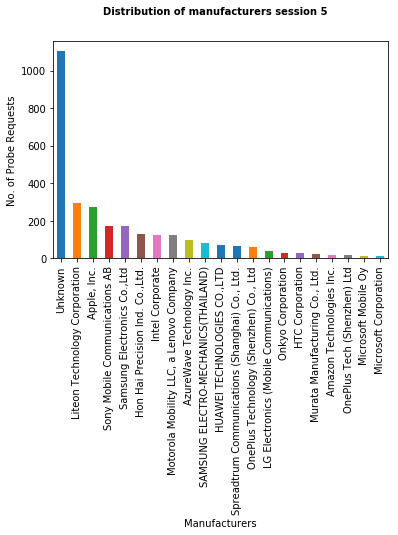

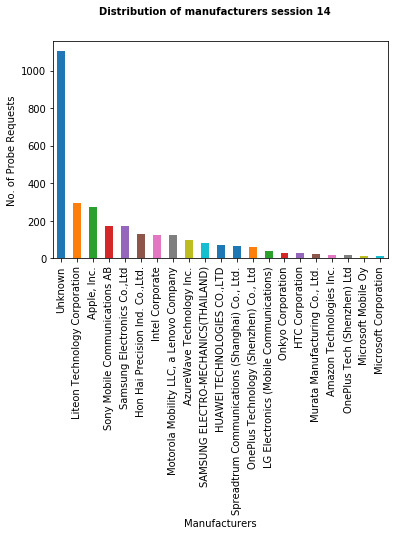

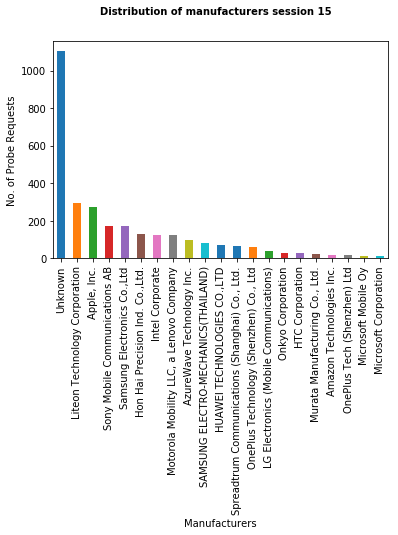

In [6]:
title_string = "Distribution of manufacturers"

# session 4
fig = plt.figure()
fig.suptitle(title_string+' session 4', y=1.0, fontweight='bold', fontsize=10)

ax = fig.add_subplot(111)
ax.set_xlabel('Manufacturers')
ax.set_ylabel('No. of Probe Requests')

df4 = session4["MANUFACTURER"].value_counts()[session4["MANUFACTURER"].value_counts()>10]
df4.plot(kind='bar')

# session 5
fig = plt.figure()
fig.suptitle(title_string+' session 5', y=1.0, fontweight='bold', fontsize=10)

ax = fig.add_subplot(111)
ax.set_xlabel('Manufacturers')
ax.set_ylabel('No. of Probe Requests')

df5 = session5["MANUFACTURER"].value_counts()[session5["MANUFACTURER"].value_counts()>10]
df5.plot(kind='bar')

# session 14
fig = plt.figure()
fig.suptitle(title_string+' session 14', y=1.0, fontweight='bold', fontsize=10)

ax = fig.add_subplot(111)
ax.set_xlabel('Manufacturers')
ax.set_ylabel('No. of Probe Requests')

df5 = session5["MANUFACTURER"].value_counts()[session5["MANUFACTURER"].value_counts()>10]
df5.plot(kind='bar')

# session 15
fig = plt.figure()
fig.suptitle(title_string+' session 15', y=1.0, fontweight='bold', fontsize=10)

ax = fig.add_subplot(111)
ax.set_xlabel('Manufacturers')
ax.set_ylabel('No. of Probe Requests')

df5 = session5["MANUFACTURER"].value_counts()[session5["MANUFACTURER"].value_counts()>10]
df5.plot(kind='bar')


plt.show()


Distribution of Probe Requests over Time - session 4

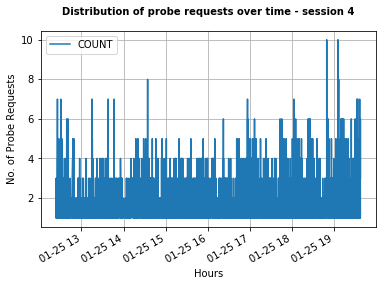

In [143]:
title_string = "Distribution of probe requests over time - session 4"

reqOverTime4 = session4["TIME"].value_counts()

df = pd.DataFrame(reqOverTime4.reset_index())
df.columns = ['TIME', 'COUNT']
df['TIME'] = pd.to_datetime(df['TIME'])
df.index = df['TIME']
del df['TIME']
df.plot()

plt.xlabel('Hours')
plt.ylabel('No. of Probe Requests')
plt.title(title_string, y=1.05, fontweight='bold', fontsize=10)
plt.grid(True)
plt.show()

Distribution of Probe Requests over Time - session 5

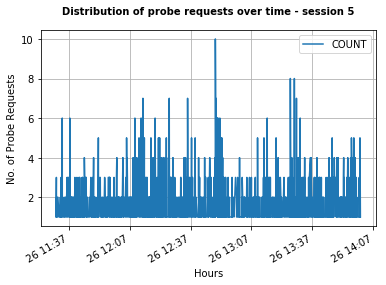

In [144]:
title_string = "Distribution of probe requests over time - session 5"

reqOverTime = session5["TIME"].value_counts()

df = pd.DataFrame(reqOverTime.reset_index())
df.columns = ['TIME', 'COUNT']
df['TIME'] = pd.to_datetime(df['TIME'])
df.index = df['TIME']
del df['TIME']
df.plot()

plt.xlabel('Hours')
plt.ylabel('No. of Probe Requests')
plt.title(title_string, y=1.05, fontweight='bold', fontsize=10)
plt.grid(True)
plt.show()

Distribution of Probe Requests over Time - session 14

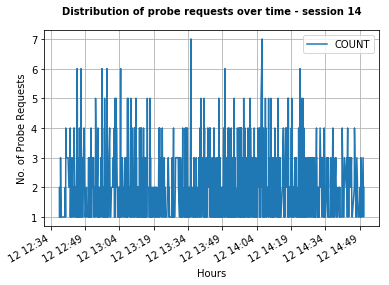

In [145]:
title_string = "Distribution of probe requests over time - session 14"

reqOverTime = session14["TIME"].value_counts()

df = pd.DataFrame(reqOverTime.reset_index())
df.columns = ['TIME', 'COUNT']
df['TIME'] = pd.to_datetime(df['TIME'])
df.index = df['TIME']
del df['TIME']
df.plot()

plt.xlabel('Hours')
plt.ylabel('No. of Probe Requests')
plt.title(title_string, y=1.05, fontweight='bold', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
Distribution of Probe Requests over Time - session 15

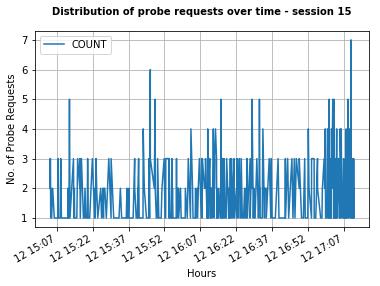

In [146]:
title_string = "Distribution of probe requests over time - session 15"

reqOverTime = session15["TIME"].value_counts()

df = pd.DataFrame(reqOverTime.reset_index())
df.columns = ['TIME', 'COUNT']
df['TIME'] = pd.to_datetime(df['TIME'])
df.index = df['TIME']
del df['TIME']
df.plot()

plt.xlabel('Hours')
plt.ylabel('No. of Probe Requests')
plt.title(title_string, y=1.05, fontweight='bold', fontsize=10)
plt.grid(True)
plt.show()